In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv', delimiter=',')
print(data.shape)
# data = data.loc[~((data['Glucose'] == 0) | (data['BloodPressure'] == 0)|(data['SkinThickness'] == 0) | (data['BMI'] == 0))]
data.replace(0,data.mean(axis=0),inplace=True)
print(data.shape)
print(data.describe().T)

(768, 9)
(768, 9)
                          count        mean        std        min        25%  \
Pregnancies               768.0    4.400782   2.984162   1.000000   2.000000   
Glucose                   768.0  121.681605  30.436016  44.000000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200000  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078000   0.243750   
Age                       768.0   33.240885  11.760232  21.000000  24.000000   
Outcome                   768.0    0.576145   0.310515   0.348958   0.348958   

                                 50%        75%     max  
Pregnancies                 3.845052    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPr

In [3]:

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df.head()
print(scaled_df.describe().T)
print(type(scaled_df.describe().T))

# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.029872  0.020256  0.006788  0.013576   
Glucose                   768.0  0.035007  0.008756  0.012659  0.028698   
BloodPressure             768.0  0.035588  0.005968  0.011821  0.031522   
SkinThickness             768.0  0.033932  0.012283  0.008927  0.026191   
Insulin                   768.0  0.028399  0.022277  0.003351  0.019098   
BMI                       768.0  0.035302  0.007479  0.019799  0.029916   
DiabetesPedigreeFunction  768.0  0.029538  0.020740  0.004883  0.015258   
Age                       768.0  0.034021  0.012036  0.021493  0.024563   
Outcome                   768.0  0.031769  0.017122  0.019242  0.019242   

                               50%       75%       max  
Pregnancies               0.026099  0.040727  0.115393  
Glucose                   0.033660  0.040349  0.057251  
BloodPressure             0.035463  0.039403  0.060090  
SkinThickness        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0e42b2ac0>]],
      dtype=object)

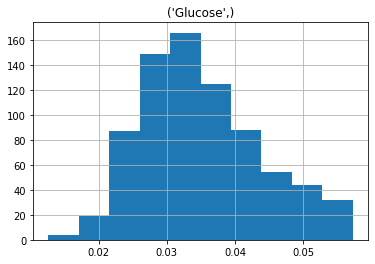

In [4]:
scaled_df.hist(column="Glucose")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0e41964f0>]],
      dtype=object)

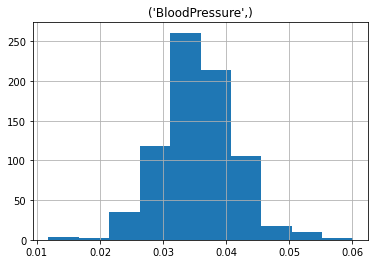

In [5]:
scaled_df.hist(column="BloodPressure")

In [6]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.04072683 0.04257898 0.03546267 ... 0.03655192 0.03924821 0.05117289]
 [0.00678781 0.02445414 0.03250745 ... 0.02893694 0.02197149 0.03172719]
 [0.05430244 0.05264833 0.03152238 ... 0.02534702 0.04206507 0.03275065]
 ...
 [0.03393903 0.03481119 0.03546267 ... 0.0285018  0.01533622 0.03070373]
 [0.00678781 0.03624967 0.02955223 ... 0.03274443 0.02184629 0.04810252]
 [0.00678781 0.02675571 0.0344776  ... 0.03307079 0.019718   0.02353953]]
[1.         0.34895833 1.         0.34895833 1.         0.34895833
 1.         0.34895833 1.         1.         0.34895833 1.
 0.34895833 1.         1.         1.         1.         1.
 0.34895833 1.         0.34895833 0.34895833 1.         1.
 1.         1.         1.         0.34895833 0.34895833 0.34895833
 0.34895833 1.         0.34895833 0.34895833 0.34895833 0.34895833
 0.34895833 1.         1.         1.         0.34895833 0.34895833
 0.34895833 1.         0.34895833 1.         0.34895833 0.34895833
 1.         0.34895833 0.34895833 0.34895833

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [8]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 34.64
8/8 [==============================] - 0s 2ms/step
[0.04072683370647543, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 1 (expected 0)
[0.03393902808872953, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 1 (expected 0)
[0.020363416853237715, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.027151222470983623, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.027151222470983623, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [10]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.1153927  0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]
[0.00678781 0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]


In [11]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [58]:
print(len(x_test))

231


#Max Max - Min Min

In [49]:
MaxMax = [[0 for x in range(28)] for y in range(len(x_test))]

In [63]:
prediction_max = []
for i in range(len(x_test)):
  row_index = 0
  X_single= np.full((28,8),x_test[i])
  for m in range(8):
    for j in range(m+1,8):
      X_single[row_index][m] = max[m]
      X_single[row_index][j] = max[j]
      row_index +=1
  predictions_sub_max = model.predict(X_single).reshape((1,28))
  # MaxMax[i] = predictions_sub_max
  if len(prediction_max) == 0:
      prediction_max = predictions_sub_max
  else:
      prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)





1/1 [==============================] - 0s 17ms/step


In [70]:
# MaxMax = np.array(MaxMax)
# print(MaxMax)
prediction_max = prediction_max.reshape((231,28))
print(prediction_max)



[[0.93339115 0.78670037 0.7896058  ... 0.88619876 0.7671289  0.87083113]
 [0.94034195 0.88631946 0.8979272  ... 0.92009497 0.8427083  0.87367237]
 [0.90216523 0.73832184 0.75691605 ... 0.82522815 0.753513   0.824456  ]
 ...
 [0.8909684  0.7123001  0.7479433  ... 0.7738258  0.74592996 0.7661431 ]
 [0.90689224 0.70287913 0.713829   ... 0.8042453  0.7172247  0.80626667]
 [0.9641583  0.9505267  0.9563057  ... 0.93710876 0.930005   0.9539431 ]]


In [69]:
prediction_min = []
for i in range(len(x_test)):
  row_index = 0
  X_single= np.full((28,8),x_test[i])
  for m in range(8):
    for j in range(m+1,8):
      X_single[row_index][m] = min[m]
      X_single[row_index][j] = min[j]
      row_index +=1
  predictions_sub_min = model.predict(X_single).reshape((1,28))
  # MaxMax[i] = predictions_sub_max
  if len(prediction_min) == 0:
      prediction_min = predictions_sub_min
  else:
      prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)

1/1 [==============================] - 0s 24ms/step


In [71]:
prediction_min = prediction_min.reshape((231,28))
print(prediction_min)

[[0.37471646 0.40226915 0.38478214 ... 0.44766438 0.37471643 0.43526667]
 [0.37471646 0.58722764 0.59448874 ... 0.634728   0.47337276 0.5034712 ]
 [0.37471646 0.37471646 0.37471646 ... 0.37471643 0.37471643 0.37471643]
 ...
 [0.37471646 0.37471646 0.37471646 ... 0.37471643 0.37471643 0.37471643]
 [0.37471646 0.37471646 0.37471646 ... 0.37471643 0.37471643 0.37471643]
 [0.52177125 0.78886706 0.78039104 ... 0.5986508  0.7026339  0.7096479 ]]


In [12]:
# prediction_max = []
# col_index = 0
# for j in range(8):
#     col_index += 1
#     X_max = np.copy(x_test)
#     for i in range(len(x_test)):
#       X_max[i][j] = max[j]
#     _, accuracy = model.evaluate(X_max, y_test, verbose=0)
#     predictions_sub_max = model.predict(X_max) 
#     if len(prediction_max) == 0:
#       prediction_max = predictions_sub_max
#     else:
#       prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
# print(prediction_max)


8/8 [==============================] - 0s 2ms/step
[[0.76456237 0.83225536 0.56211346 ... 0.6984549  0.8352998  0.61648864]
 [0.8782758  0.85143375 0.7114288  ... 0.8427083  0.87367237 0.6952652 ]
 [0.7186236  0.70646447 0.42409658 ... 0.6163903  0.7362777  0.559118  ]
 ...
 [0.699509   0.65375006 0.37471643 ... 0.58837956 0.6385276  0.5073937 ]
 [0.6731979  0.7412198  0.40462    ... 0.5751436  0.70824903 0.5257909 ]
 [0.9481591  0.8853603  0.8171597  ... 0.8681339  0.918871   0.89821345]]


In [13]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [14]:
# prediction_min = []
# for j in range(8):
#   X_min = np.copy(x_test)
#   for i in range(len(x_test)):
#     X_min[i][j] = min[j]
#   _, accuracy = model.evaluate(X_min, y_test, verbose=0)
#   predictions_sub_min = model.predict(X_min) 
#   if len(prediction_min) == 0:
#     prediction_min = predictions_sub_min
#   else:
#     prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
# print(prediction_min)


8/8 [==============================] - 0s 3ms/step
[[0.4116186  0.40951315 0.5209154  ... 0.44766438 0.53057474 0.43526667]
 [0.60851336 0.44478008 0.67618626 ... 0.6521392  0.6789499  0.52243143]
 [0.37471646 0.37471646 0.3841401  ... 0.37471646 0.3781798  0.37813255]
 ...
 [0.37471643 0.37471643 0.37471643 ... 0.37471643 0.37471643 0.37471643]
 [0.37471643 0.37471643 0.37471643 ... 0.37471643 0.37471643 0.37471643]
 [0.80527675 0.5217713  0.78886706 ... 0.7094729  0.7163906  0.8000574 ]]


In [72]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(231, 28)


In [75]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
# heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
heatmap_diff = pd.DataFrame(result)
print(heatmap_diff)


           0         1         2         3         4         5         6   \
0    0.558675  0.384431  0.404824  0.530686  0.494649  0.503679  0.447301   
1    0.565625  0.299092  0.303438  0.370956  0.375571  0.350052  0.451250   
2    0.527449  0.363605  0.382200  0.523324  0.485549  0.504901  0.454605   
3    0.550854  0.388237  0.403566  0.528192  0.487705  0.517812  0.469546   
4    0.514461  0.315864  0.330787  0.499892  0.466823  0.472811  0.414038   
..        ...       ...       ...       ...       ...       ...       ...   
226  0.559649  0.302130  0.306646  0.373745  0.417127  0.383497  0.395110   
227  0.554539  0.331138  0.338192  0.419283  0.465857  0.473135  0.398429   
228  0.516252  0.337584  0.373227  0.516688  0.492866  0.471258  0.452312   
229  0.532176  0.328163  0.339113  0.505639  0.450221  0.484854  0.419504   
230  0.442387  0.161660  0.175915  0.279545  0.250628  0.257611  0.170899   

           7         8         9   ...        18        19        20  \
0  

In [76]:
test_heat = heatmap_diff.iloc[0:5,:]
print(test_heat)

         0         1         2         3         4         5         6   \
0  0.558675  0.384431  0.404824  0.530686  0.494649  0.503679  0.447301   
1  0.565625  0.299092  0.303438  0.370956  0.375571  0.350052  0.451250   
2  0.527449  0.363605  0.382200  0.523324  0.485549  0.504901  0.454605   
3  0.550854  0.388237  0.403566  0.528192  0.487705  0.517812  0.469546   
4  0.514461  0.315864  0.330787  0.499892  0.466823  0.472811  0.414038   

         7         8         9   ...        18        19        20        21  \
0  0.449104  0.468772  0.558493  ...  0.331644  0.307873  0.375321  0.242117   
1  0.437938  0.444420  0.524174  ...  0.237968  0.228484  0.251594  0.227749   
2  0.351974  0.371110  0.513309  ...  0.352423  0.287336  0.425713  0.232537   
3  0.424907  0.425867  0.546235  ...  0.345472  0.294565  0.411744  0.242753   
4  0.352186  0.366015  0.513726  ...  0.328169  0.279389  0.378589  0.196017   

         22        23        24        25        26        27  
0  0

Text(58.5, 0.5, 'difference')

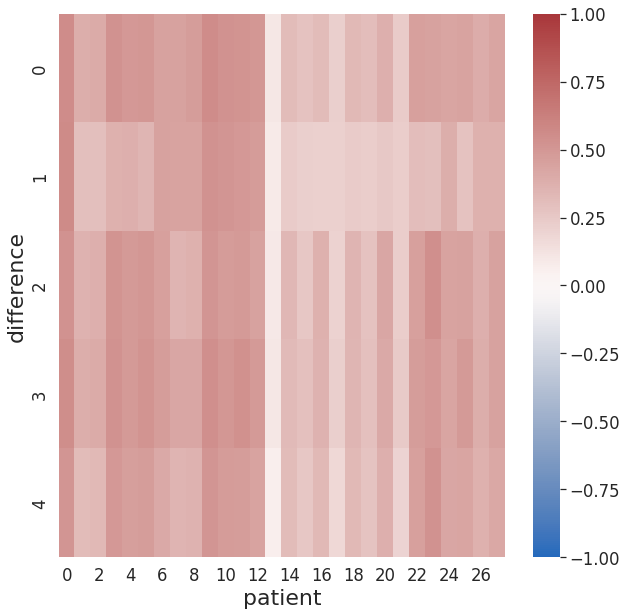

In [77]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
ax = sns.heatmap(test_heat,cmap = sns.color_palette("vlag", as_cmap=True),vmin=-1, vmax=1)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

Text(58.5, 0.5, 'difference')

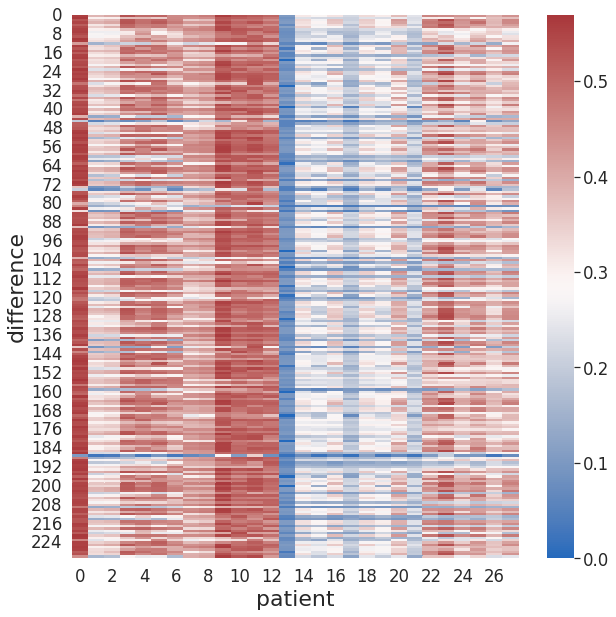

In [78]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

In [89]:
print(heatmap_diff.iloc[187])

0     0.102231
1     0.025401
2     0.035341
3     0.108616
4     0.035541
5     0.092400
6     0.031910
7     0.066438
8     0.085619
9     0.282247
10    0.107228
11    0.346189
12    0.083581
13    0.015950
14    0.075575
15    0.017832
16    0.058731
17    0.016565
18    0.112692
19    0.029145
20    0.067738
21    0.026607
22    0.106422
23    0.200463
24    0.093997
25    0.096546
26    0.027350
27    0.074930
Name: 187, dtype: float32


In [20]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [21]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


8/8 [==============================] - 0s 2ms/step
[[0.50483257 0.6471704  0.5394956  ... 0.5374414  0.61285114 0.49278733]
 [0.6937429  0.679357   0.6923016  ... 0.72881407 0.7475921  0.57964784]
 [0.44500297 0.47083357 0.40193462 ... 0.44629544 0.45998067 0.43390417]
 ...
 [0.42224476 0.4110787  0.37471643 ... 0.41759977 0.37471643 0.3836827 ]
 [0.39273223 0.5143076  0.38279927 ... 0.40443096 0.41245338 0.40124804]
 [0.8590039  0.74163735 0.8019597  ... 0.7743393  0.78477347 0.83695936]]


In [22]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


8/8 [==============================] - 0s 2ms/step
[[0.48619646 0.6210027  0.53745574 ... 0.5255054  0.59578633 0.48064256]
 [0.67767715 0.65430135 0.69055045 ... 0.7192365  0.7338876  0.5677587 ]
 [0.42667237 0.44284683 0.3999632  ... 0.4344823  0.4423095  0.42200315]
 ...
 [0.40416887 0.38406584 0.37471643 ... 0.40598926 0.37471643 0.37510896]
 [0.37556565 0.48611054 0.380862   ... 0.39293954 0.39527163 0.38962626]
 [0.8494558  0.71956134 0.8005497  ... 0.7663302  0.77134615 0.8296952 ]]


In [23]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(231, 8)


In [24]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.018636  0.026168      0.002040      0.002965  0.006752  0.011936   
1      0.016066  0.025056      0.001751      0.002492  0.005657  0.009578   
2      0.018331  0.027987      0.001971      0.002868  0.006547  0.011813   
3      0.018623  0.027853      0.002047      0.002952  0.006764  0.011936   
4      0.002921  0.027870      0.000000      0.000000  0.002389  0.011733   
..          ...       ...           ...           ...       ...       ...   
226    0.016193  0.026628      0.001881      0.002689  0.006109  0.011115   
227    0.017342  0.023191      0.001855      0.002629  0.005972  0.011096   
228    0.018076  0.027013      0.000000      0.000000  0.000000  0.011611   
229    0.017167  0.028197      0.001937      0.002219  0.006432  0.011491   
230    0.009548  0.022076      0.001410      0.001827  0.005545  0.008009   

    DiabetesPedigreeFunction       Age  
0                   0.017065  0.01

Text(58.5, 0.5, 'difference')

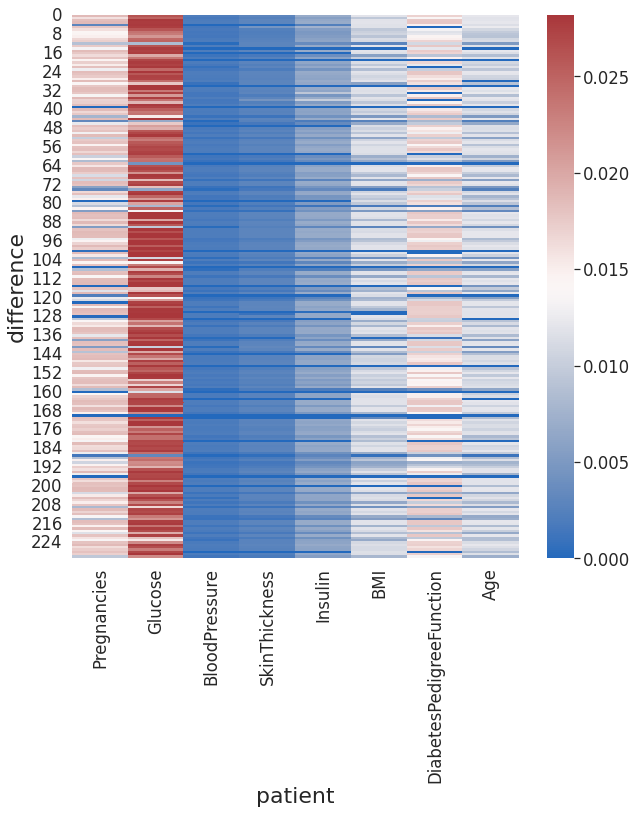

In [25]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)